In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customer_Churn.xlsx to Customer_Churn.xlsx


----- Data Head -----
  COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0    zero   31953        0         6  313378            161   
1     one   36147        0        13  800586            244   
2     one   27273      230         0  305049            201   
3    zero  120070       38        33  788235            780   
4     one   29215      208        85  224784            241   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTION  \
0                            0                      4                 unsat   
1                            0                      6                 unsat   
2                           16                     15                 unsat   
3                            3                      2                 unsat   
4                           21                      1            very_unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  LEAVE  
0               little                         no   STAY  
1     

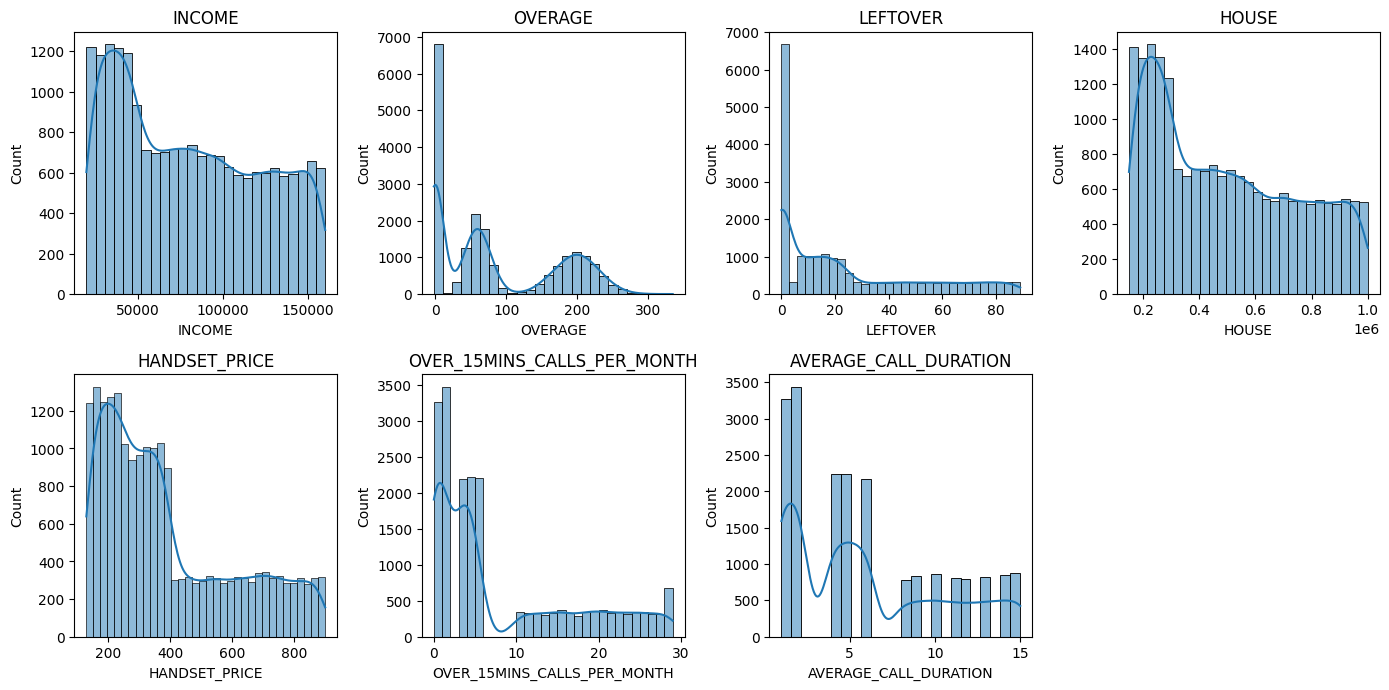

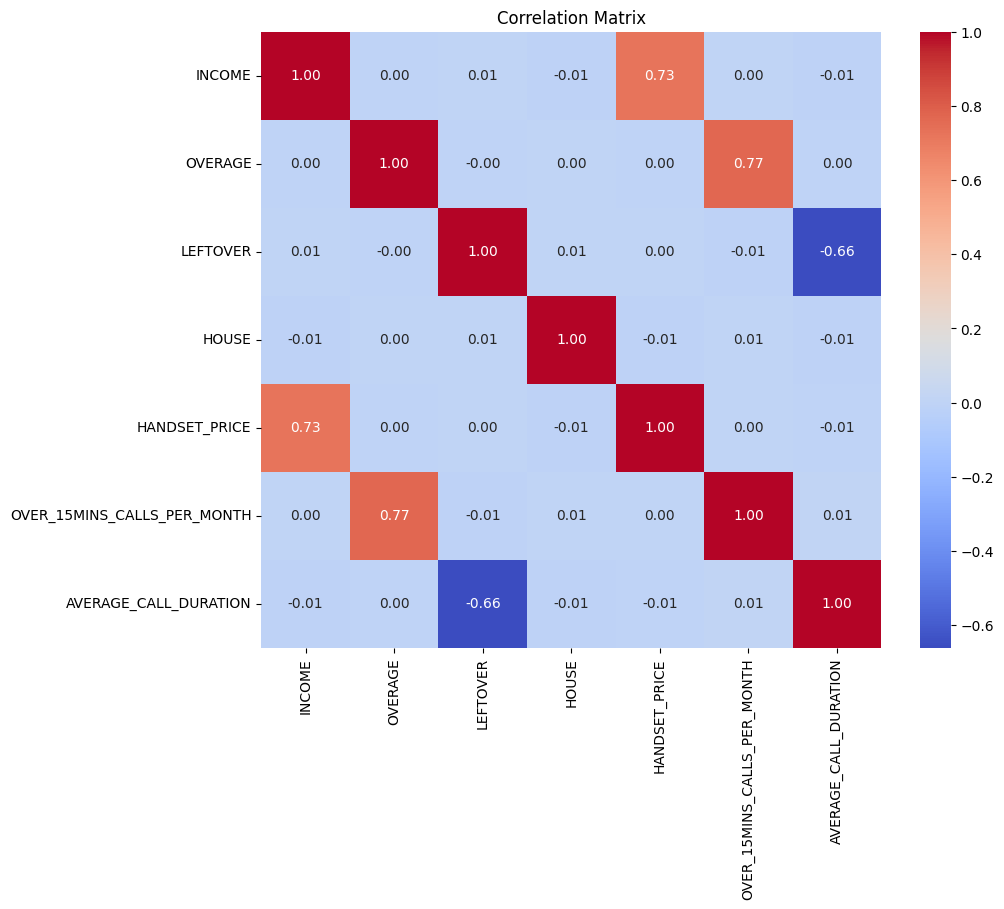


----- Missing Values After Cleaning -----
COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
LEAVE                          0
dtype: int64

Target column 'CHURN' not found in the dataset. Please check the dataset for the proper target variable.


<ipython-input-2-6db8199a2eb3>:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
#!/usr/bin/env python3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the data from the Excel file (update the path if necessary)
df = pd.read_excel("Customer_Churn.xlsx")

# Display the first few rows
print("----- Data Head -----")
print(df.head())

# Get information on columns, data types, and missing values
print("\n----- Data Info -----")
print(df.info())

# Generate summary statistics for all columns
print("\n----- Summary Statistics -----")
print(df.describe(include='all'))

# Display missing values for each column
missing_counts = df.isnull().sum()
print("\n----- Missing Values Per Column -----")
print(missing_counts)



# Select numerical columns for plotting
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms with KDE for all numerical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()



# Compute the correlation matrix on numerical columns
corr_matrix = df[numeric_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



# Here we check if the columns exist before dropping
crucial_columns = ['PHONE_USAGE', 'HANDSET_PRICE']
for col in crucial_columns:
    if col in df.columns:
        df = df.dropna(subset=[col])

# Alternatively, fill missing values for numeric columns with the median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("\n----- Missing Values After Cleaning -----")
print(df.isnull().sum())



if 'HANDSET_PRICE' in df.columns:
    df['HANDSET_PRICE_LOG'] = np.log1p(df['HANDSET_PRICE'])

if 'EDUCATION' in df.columns:
    df = pd.get_dummies(df, columns=['EDUCATION'], drop_first=True)



# Check if the target column 'CHURN' exists in the data
if 'CHURN' in df.columns:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split

    # Prepare features (X) by dropping 'CHURN'
    X = df.drop('CHURN', axis=1)

    # For simplicity, only select numeric features.
    X = X.select_dtypes(include=['float64', 'int64'])
    y = df['CHURN']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Build and fit a Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Retrieve feature importances
    importances = model.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\n----- Feature Importances -----")
    print(feat_imp_df)
else:
    print("\nTarget column 'CHURN' not found in the dataset. Please check the dataset for the proper target variable.")
